<a href="https://colab.research.google.com/github/SaraSilvaa/Aula-Mineiracao-de-Dados/blob/master/Sara_Martins_da_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE P1**

## Análise Exploratória de Dados

Links deste exercício:
- https://www.kaggle.com/datasets/zynicide/wine-reviews
- https://seaborn.pydata.org/
- https://www.wine-searcher.com/critics-17-wine+enthusiast

Fomos contratados por uma grande empresa distribuidora de vinhos. Nosso cliente deseja melhorar as vendas entregando produtos que agradem os diversos perfis de clientes. O foco do nosso projeto aqui é desenvolver uma análise exploratória nos [dados de avaliações de vinhos](https://www.kaggle.com/datasets/zynicide/wine-reviews).

Uma análise exploratória bem elaborada consiste em algumas etapas:

- Compreensão do negócio
- Compreensão dos dados
- Preparar os dados (limpeza e tratamento)
- Análise de dados (extrair informações relevantes e responder perguntas)
- Avaliação dos resultados

Nosso objetivo ao concluir esse projeto é responder as seguintes perguntas:

1. De onde vem o melhor vinho ?
2. O preço do vinho está relacionado com a qualidade ?
3. Certas variedades de uvas são de maior qualidade ?
4. Qual é o melhor vinho em cada faixa de preço ?
5. Que palavras são mais utilizadas para descrever um vinho ?

Vamos começar!

#Importando as bibliotecas para a realização dos exercicios

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##Examinando o dataset que foi importado

In [56]:
df_dataset = pd.read_csv("/content/winemag-data-130k-v2.csv")
df_dataset.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


##Visualizando os dados das colunas do dataset

In [57]:
df_dataset.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

###Tendo essas informações, abaixo terá a visualização de um sumário onde detalha a funcionalidade de cada coluna do nosso dataset:

#### • **Unnamed**: Parece ser apenas uma coluna de indices que pode ser removida
#### • **Country**: país de onde o vinho foi feito (útil)
#### • **description**: descrição do vinho
#### • **designation**: vinhedo dentro da adega de onde as uvas que fizeram o vinho foram coletadas
#### • **points**: pontuação que o vinho obtee em sua avalaição (entender escala de pontos)
#### • **price**: preço da garrafa de vinho
#### • **province**: estado de onde o vinho foi feito
#### • **region_1**: é a regiao de onde o vinho foi feito
#### • **region_2**: regiao mais específica dentro de uma viticula (pode ser removido)
#### • **taster_name**: nome do revisor
#### • **taster_twitter_handle**: perfil do twitter do avaliador do vinho
#### • **title**: nome do vinho analisado (o seu ano de fabricação tambem esta no título)
#### • **variety**: tipo de uvas utilizadas na fabricação do vinho
#### • **winery**: adega onde o vinho foi feito

#Agora veremos os tipos de dados que compõe nosso dataset

In [58]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


####Podemos ver que temos ao todo 129.971 linhas e 14 colunas no nosso dataset e que também possui algumas colunas com dados faltantes e podemos descartar algumas dessas colunas como a **region_2**, **teaster_name** e **teaster_twitter_handle**

##com isso vamos descrever as colunas que possuem dados numericos dentro do dataset a seguir:

In [59]:
df_dataset.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


## O comando executado acima "describe()" nos apresentou uma distribuição de pontos para uma garrafa de vinho onde o mínimo é 80 e o máximo é 100. Também foi possível analisar que a garrafa de vinho mais barata custa 4 dólares e a mais cara 3.300 dólares. Segundo o site [Wine Enthusiast](https://https://www.wine-searcher.com/critics-17-wine+enthusiast), temos a seguinte classificação de vinhos por pontos:


* **98–100** – Clássico

* **94–97** – Excelente

* **90–93** – Excelente

* **87–89** – Muito bom

* **83–86** – Bom

* **80–82** – Aceitável


###E por meio da função value_counts() podemos contas quantos vinhos foram avaliados por cada país.



In [60]:
df_dataset["country"].value_counts()

,count
country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4472
Argentina,3800
Austria,3345
Australia,2329


###É notório que a maioria dos vinhos avaliados vêm dos **EUA, França, Itália, Espanha e Portugal**

##Podemos também utilizar o value_counts() para verificar quais tipos de uva foram mais utilizados na fabricação dos vinhos avaliados como farei abaixo:

In [61]:
df_dataset["variety"].value_counts()

,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Cabernet Sauvignon-Barbera,1
Sauvignonasse,1
Forcallà,1


## Após essa análise ate o momento, podemos concluir entao que as colunas **unamed: 0, designation, region_1, region_2, taster_name e taster_twitter_handle** podem ser removidas pois não oferecem dados satisfatórios para a nossa análise.

#**LIMPANDO E TRATANDO OS DADOS**

###A primeira coisa a ser feta nesse processo de limpeza é uma cópia do nosso DataFrame. Em seguida vamos remover as colunas que nao serão utilizadas e tratar os problemas identificados.

###A função copy() é responsável por fazer a cópia do DataFrame.

In [62]:
df_dataset_cópia = df_dataset.copy()

###Agora que foi feita a cópia, vamos começar removendo as colunas que nao vamos precisar para a nossa análise:

In [63]:
df_dataset_cópia = df_dataset_cópia.drop(["Unnamed: 0", "designation", "region_1", "region_2","taster_name", "taster_twitter_handle"], axis=1)
df_dataset_cópia.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


###Mas como mostrado a seguir, ainda temos o problema de haver alguns dados ausentes:

In [64]:
df_dataset_cópia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


##Podemos fazer alguns cálculos de proporção na coluna de preço (que é bastante importante para a nossa análise) e apresentar os dados ausentes:

###Para maior detalhe temos abaixo o tamanho da nossa base de dados utilizando comando **shape**

In [65]:
df_dataset_cópia.shape

(129971, 8)

###E assim podemos dividir a quantidade de preço pela quantidade de registros total

In [66]:
print("{:.0%}".format(df_dataset_cópia["price"].count() / df_dataset_cópia.shape[0]))

93%


###Isso indica que mesmo eliminando os dados ausentes da coluna price, ainda ficaremos com 93% das linhas restantes. Sabendo disso, podemos remover essas linhas filtrando também por país e uvas(country e variety) que também possuem dados nulos.

In [67]:
df_dataset_cópia = df_dataset_cópia.dropna(subset=["country", "price", "variety"])
df_dataset_cópia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


##Agora podemos iniciar a análise de fato pois nosso dataframe esta sem dados nulos1

#**ANÁLISE EXPLORATÓRIA**

##Para um bom início de análise é sempre bom visualizar os dados. A seguir vamos olhar para a distribuição dos pontos dados durante as avaliações dos vinhos, é um bom começo.

Text(0, 0.5, 'Frequência')

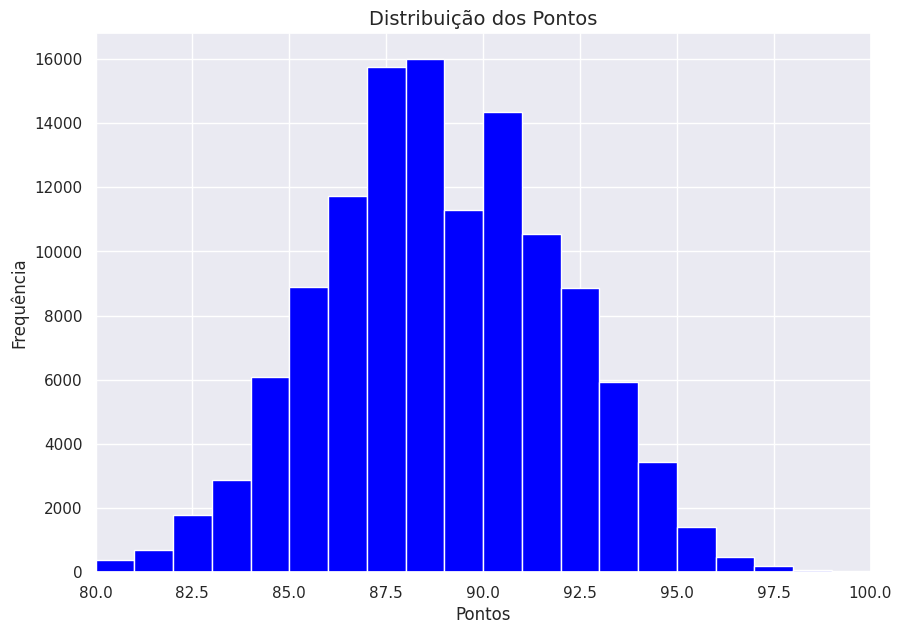

In [68]:
plt.figure(figsize=(10,7))
plt.hist(data=df_dataset_cópia, x='points',
         bins=np.arange(80,df_dataset_cópia['points'].max()+1,1),
         color='blue')
plt.xlim(80,100)
plt.title('Distribuição dos Pontos', fontsize=14)
plt.xlabel('Pontos')
plt.ylabel('Frequência')

###Podemos ver que existe uma distribuição quase normal dos pontos variando a escala entre 80 e 100. Com isso podemos tambem quais países estao no top 10 que mais produzem vinhos.

In [69]:
top10_country= df_dataset_cópia["country"].value_counts() [:10]
top10_country

,count
country,
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4415
Argentina,3756
Austria,2799
Australia,2294


###Com base no filtro acima, podemos gerar um grafico para comparar os países que mais tiveram vinhos avaliados

Text(0.5, 0, 'Total de avaliações')

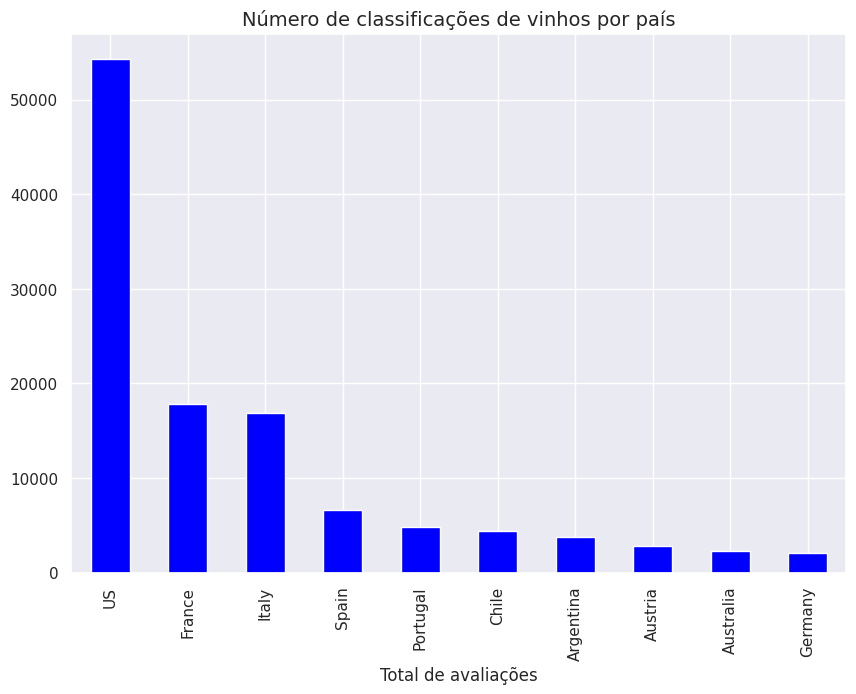

In [70]:
plt.figure(figsize=(10,7))
top10_country.plot(kind='bar', color='blue')
plt.title('Número de classificações de vinhos por país', fontsize=14)
plt.xlabel('País')
plt.xlabel('Total de avaliações')

###Com base nessa ordenação do gráfico acima, vamos investigar quantos países produzem vinho de melhro qualidade de acordo com as classificações:

In [71]:
melhor_qualidade = df_dataset_cópia.groupby("country")['points'].agg("mean")
melhor_qualidade = melhor_qualidade.sort_values(ascending=False)[:10]
#Converter em uma série o dataframe usando o método to_Frame()
melhor_qualidade.to_frame().style.background_gradient(cmap='Greens',high=0.5)

,points
country,
England,91.550725
India,90.222222
Austria,90.190782
Germany,89.836321
Canada,89.377953
Hungary,89.165517
China,89.000000
France,88.734867
Luxembourg,88.666667


###Podemos gerar a partir desse filtro outro grafico também:

<ipython-input-72-d45f29955a48>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'Pais')

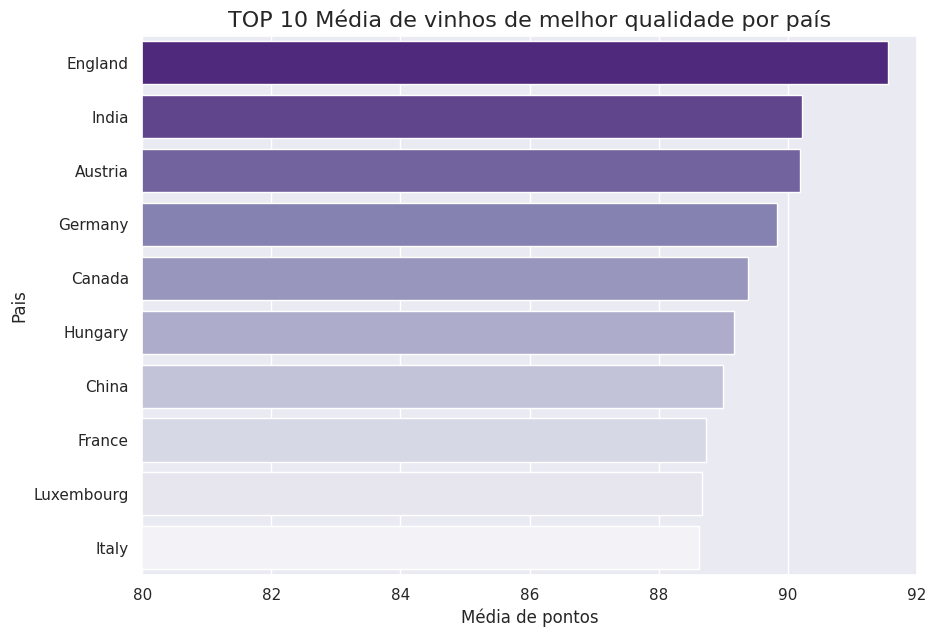

In [72]:
y = melhor_qualidade.index.to_series()
x = melhor_qualidade

plt.figure(figsize=(10,7))
plt.xlim(80,92)
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('TOP 10 Média de vinhos de melhor qualidade por país', fontsize=16)
plt.xlabel('Média de pontos')
plt.ylabel('Pais')

###Com essa análise foi possivel visualizar que o país que produziu o vinho de melhor qualidade foi a Inglaterra, isso ocorre porque talvez haja menos vinhos da inglaterra no nosso dataframe e eles tenham uma pontuação alta, representando o aumento na média. Vale a pena investigarmos isso mais fundo, podemos olhar para outros países com pontuação máxima acima de 95 (vinhos excelentes)

In [73]:
#Vinhos com classificação alta por país(95-100)
high_scores=df_dataset_cópia[df_dataset_cópia["points"]>=95]
high_scores["country"].value_counts()

,count
country,
US,991
France,509
Italy,326
Austria,103
Portugal,96
Germany,62
Spain,51
Australia,47
Argentina,11


###Com isso, os países com pontuações mais altas entre 95 e 100 pontos, vao ficar diferente dos graficos que possuem pontuações com base na média. Construiremos um grafico bloxpot para analisar isso. Como essa base apresenta mais vinhos avaliados dos EUA, é provável que haja uma grande variedade de vinhos do páis, enquanto a Inglaterra, que teve a melhor pontuação média, aoresenta menos vinhos na base de dados, o que resulta em uma análise injusta.

Text(0, 0.5, 'País')

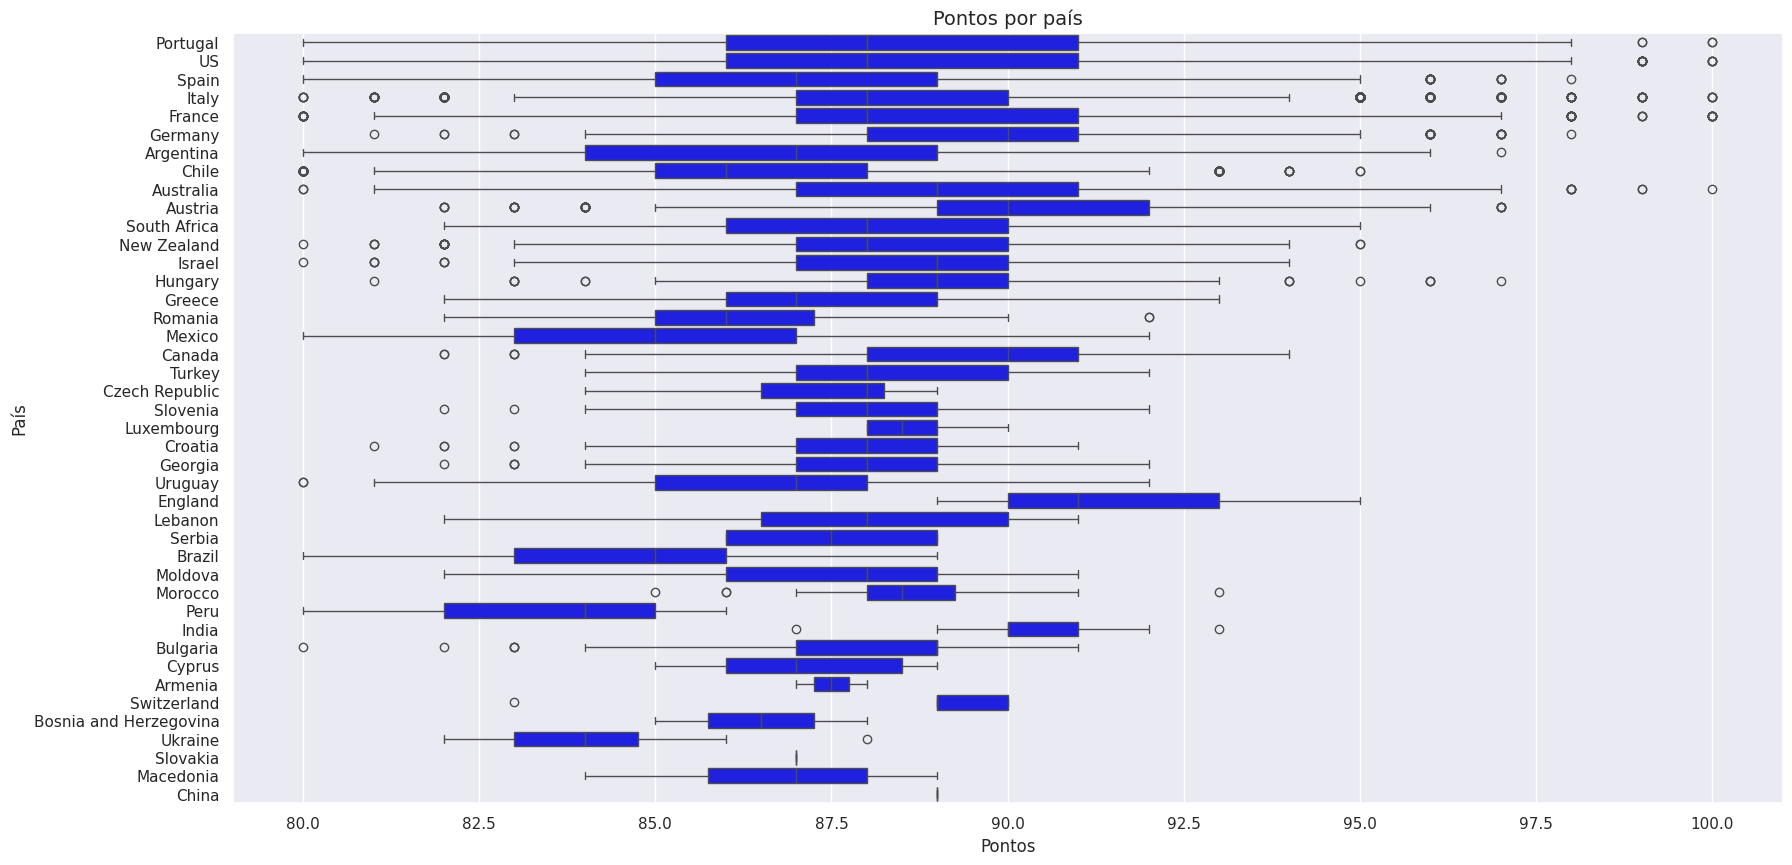

In [74]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_dataset_cópia, x='points', y='country', color='blue')
plt.title('Pontos por país', fontsize=14)
plt.xlabel('Pontos')
plt.ylabel('País')

###Embora na média a Inglaterra tenha os pontos mais altos, os vinhos de Portugal, EUA, Itália, França e Austrália, receberam uma pontuação perfeita de 100. Como esses países possuem um volume maior de vinhos, receberam uma gama maior de pontos.

##Agora vamos ver as distribuições de valores nos países:

<ipython-input-75-2ac84e6fc38d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'País')

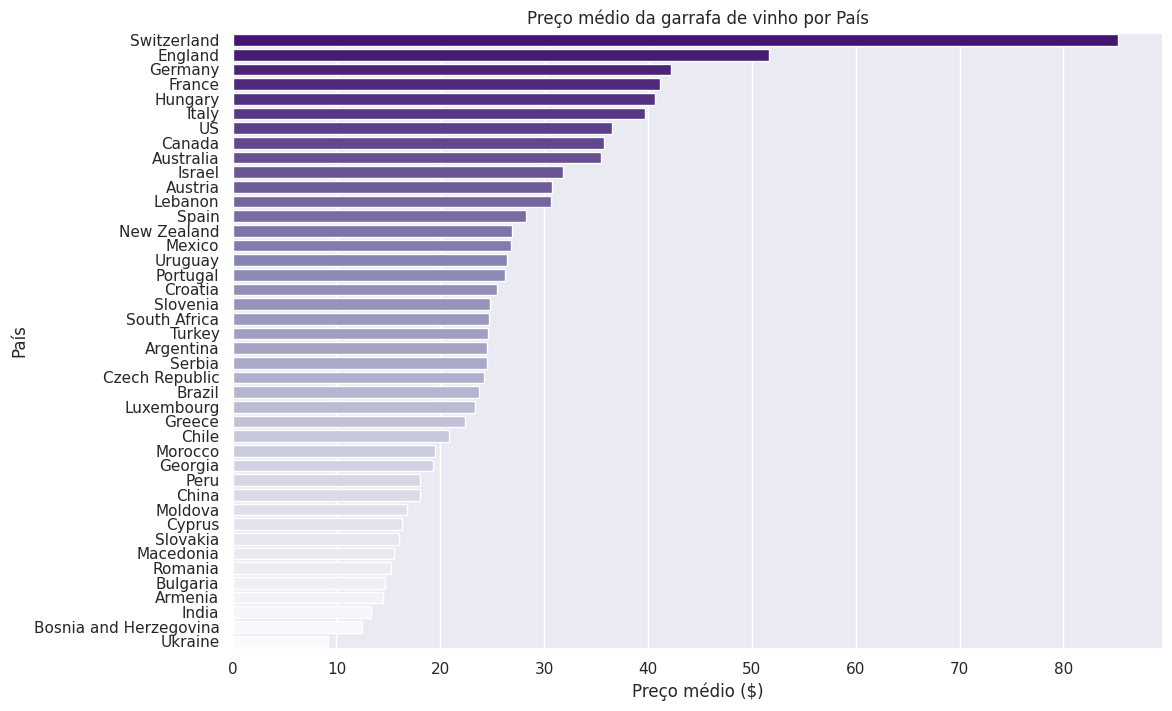

In [75]:
media_preco=df_dataset_cópia.groupby("country")['price'].mean()
media_preco = media_preco.sort_values(ascending=False)
y=media_preco.index.to_series()
x=media_preco.values

plt.figure(figsize=(12,8))
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Preço médio da garrafa de vinho por País')
plt.xlabel('Preço médio ($)')
plt.ylabel('País')

###Podemos ver acima que o vinho mais caro vem da Suiça com seu preço médio a mais de 80 dolares, ja na Ucrânia o preço médio está abaixo de $10 a garrafa. Vamos ver a seguir se o preço esta relacionado com a qualidade do vinho utilizando histogramas:

Text(0, 0.5, 'Frequência')

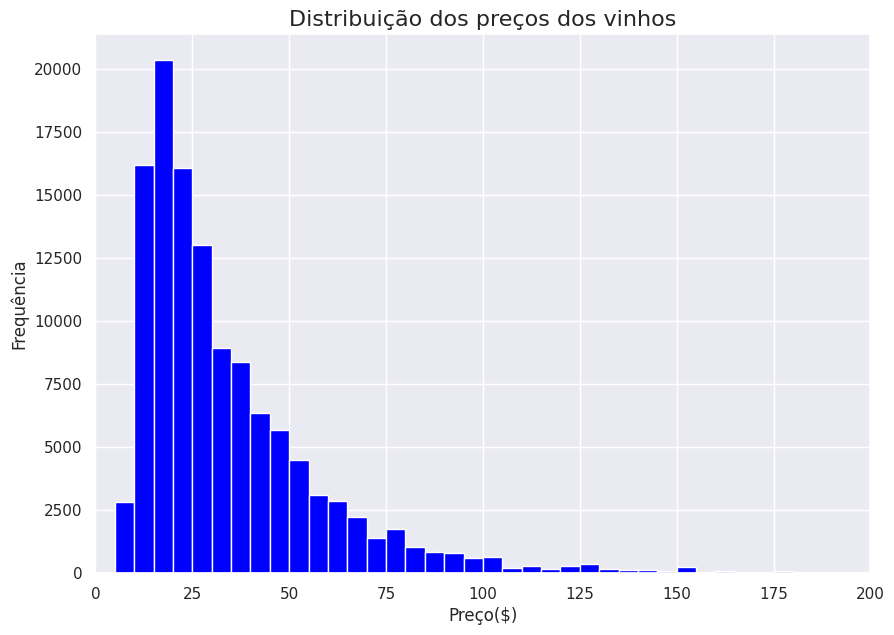

In [76]:
plt.figure(figsize=(10,7))
bins=np.arange(0,df_dataset_cópia["price"].max()+5,5)
plt.hist(data=df_dataset_cópia, x='price', bins=bins, color='blue')
plt.xlim(0,200)
plt.title('Distribuição dos preços dos vinhos', fontsize=16)
plt.xlabel('Preço($)')
plt.ylabel('Frequência')

###Como podemos ver, os dados possuem uma grande taxa ao lado esquerdo. Nesse caso podemos fazer uma transformação logarítmica nos dados.

In [77]:
#Distribuição normal
df_dataset_cópia["price"].describe()

,price
count,120915.000000
mean,35.368796
std,41.031188
min,4.000000
25%,17.000000
50%,25.000000
75%,42.000000
max,3300.000000


In [78]:
#Distribuição logarítmica
np.log10(df_dataset_cópia["price"].describe())

,price
count,5.082480
mean,1.548620
std,1.613114
min,0.602060
25%,1.230449
50%,1.397940
75%,1.623249
max,3.518514


###E agora tranformaremos essa distribuição logarítmica em um gráfico de histograma

Text(0, 0.5, 'Frequência')

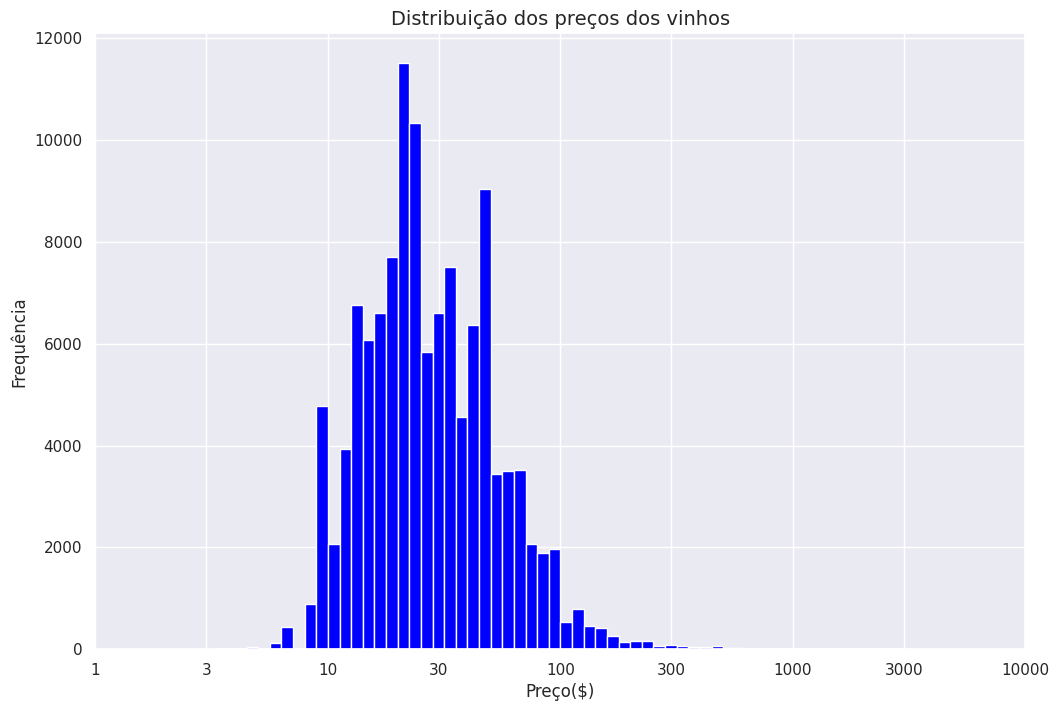

In [79]:
plt.figure(figsize=(12,8))
bins=10**np.arange(0.5,3.5 + 0.05,0.05)
ticks = [1,3,10,30,100,300,1000,3000,10000]
plt.hist(data=df_dataset_cópia,x='price', bins=bins, color='blue')
plt.title('Distribuição dos preços dos vinhos', fontsize=14)
plt.xscale('log')
plt.xticks(ticks,ticks)
plt.xlabel('Preço($)')
plt.ylabel('Frequência')

###Agora é possivel ver uma distribuição quase normal, existe um salto na regiao dos 10 dólares tendo um pico mais visível, assim como os 50 dólares. Com isso vamos usar um grafico tipo scatter para visualizar se existe uma correlação entre a pontuação e o valor da garrafa.

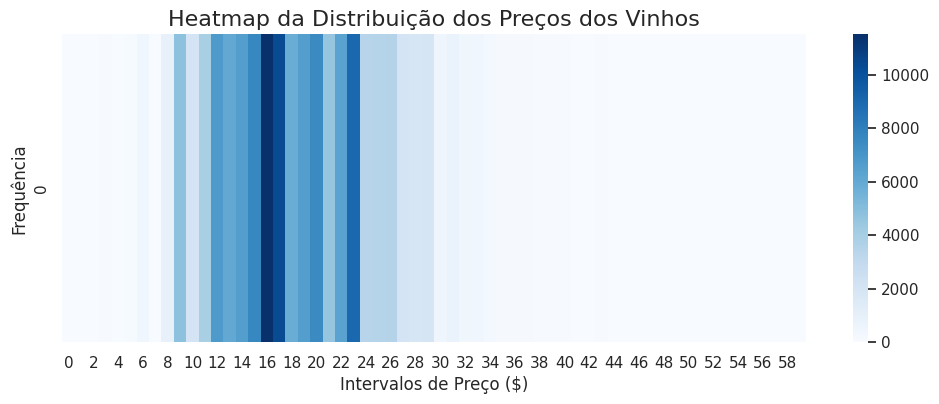

In [117]:
#HeatMap (mapa de calor)

bins = 10**np.arange(0.5, 3.5 + 0.05, 0.05)
plt.figure(figsize=(12, 4))
sns.heatmap([hist],   cmap='Blues')
plt.title('Heatmap da Distribuição dos Preços dos Vinhos', fontsize=16)
plt.xlabel('Intervalos de Preço ($)')
plt.ylabel('Frequência')
plt.show()

Text(0, 0.5, 'Pontos')

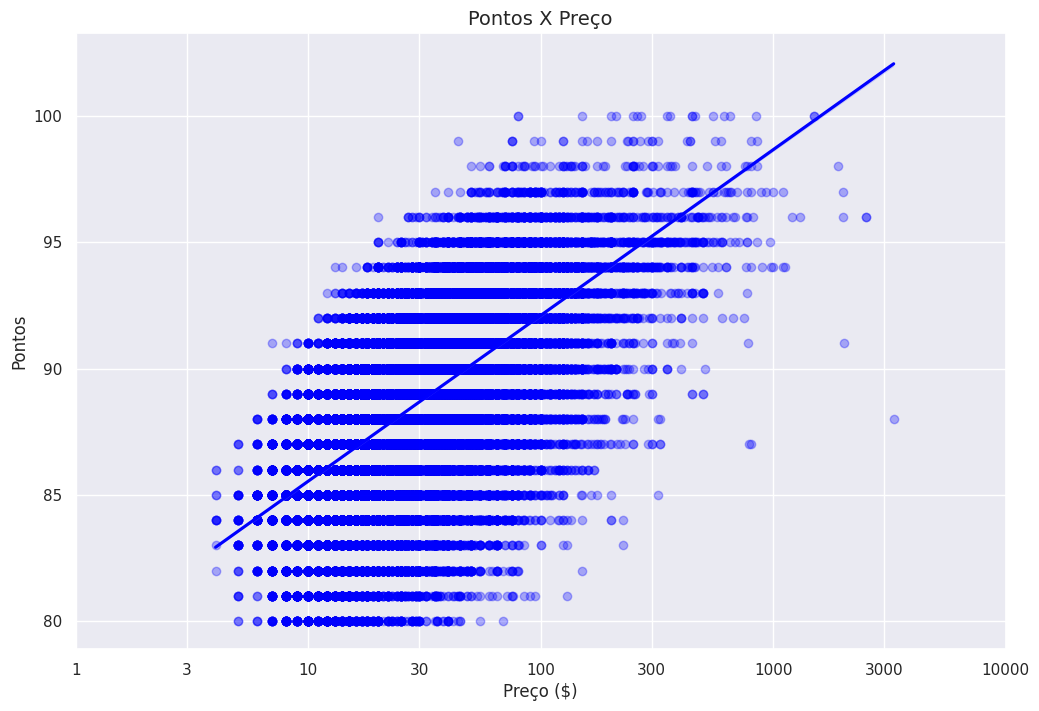

In [80]:
x=[1,3,10,30,100,300,1000,3000,10000]

plt.figure(figsize=(12,8))
sns.regplot(x='price',y='points', data=df_dataset_cópia, color='blue', logx=True, scatter_kws={'alpha':0.3})
plt.title("Pontos X Preço", fontsize=14)
plt.xscale('log')
plt.xticks(x,x)
plt.xlabel("Preço ($)")
plt.ylabel("Pontos")

###Podemos observar acima que conforme a quantidade de pontos aumenta o preço também aumenta ou seja, eles têm uma correlação. Podemos ver tambem que temos dois pontos mais afastados, um na área dos 4 dólares e outro depois de 3000 dólares, abaixo vamos listar eles para descobrir quais vinhos são:

In [81]:
df_dataset_cópia[df_dataset_cópia["price"]==df_dataset_cópia["price"].min()][:1]

,country,description,points,price,province,title,variety,winery
1987,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis


In [82]:
df_dataset_cópia[df_dataset_cópia["price"]==df_dataset_cópia["price"].max()][:1]

,country,description,points,price,province,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


###Temos entao o vinho Espanhol com o valor de 4 dólares e sua pontuação 85 e o vinho Francês com o valor de 3300 dólares e sua pontuação em 88. Com isso vamos analisar se algumas variedades de uva sao de melhor qualidade e podemos assim entao filtrar uma amostra de 20 melhores vinhos e ver como eles pontuam:

In [83]:
df_dataset_cópia["variety"].value_counts()[:20]

,count
variety,
Pinot Noir,12785
Chardonnay,11077
Cabernet Sauvignon,9384
Red Blend,8466
Bordeaux-style Red Blend,5340
Riesling,4971
Sauvignon Blanc,4780
Syrah,4086
Rosé,3261


##Como sempre, visualizaremos os dados:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Pinot Noir'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Cabernet Sauvignon'),
  Text(3, 0, 'Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Riesling'),
  Text(6, 0, 'Sauvignon Blanc'),
  Text(7, 0, 'Syrah'),
  Text(8, 0, 'Rosé'),
  Text(9, 0, 'Merlot'),
  Text(10, 0, 'Zinfandel'),
  Text(11, 0, 'Malbec'),
  Text(12, 0, 'Sangiovese'),
  Text(13, 0, 'Nebbiolo'),
  Text(14, 0, 'Portuguese Red'),
  Text(15, 0, 'White Blend'),
  Text(16, 0, 'Sparkling Blend'),
  Text(17, 0, 'Tempranillo'),
  Text(18, 0, 'Rhône-style Red Blend'),
  Text(19, 0, 'Pinot Gris')])

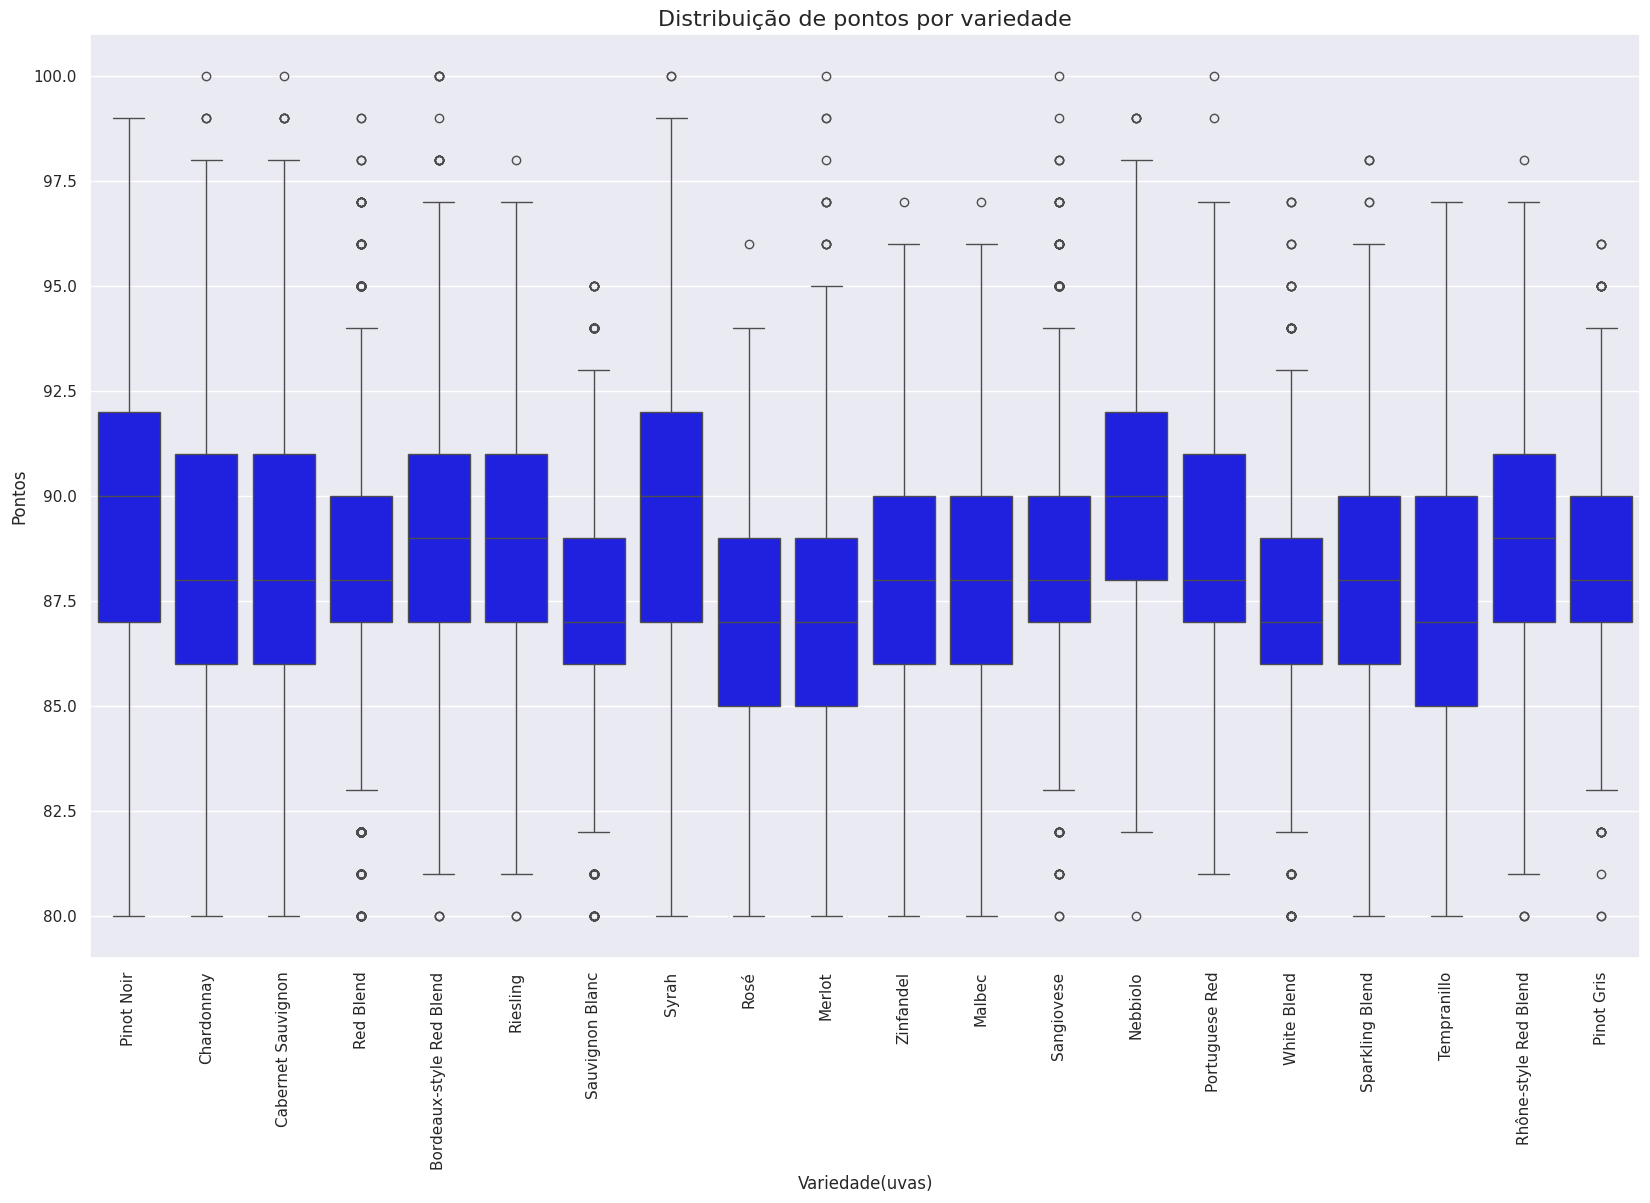

In [84]:
plt.figure(figsize=(20,12))
sns.boxplot(data=df_dataset_cópia,
            x='variety',
            y='points',
            color="blue",
            order=df_dataset_cópia["variety"].value_counts().iloc[:20].index)

plt.title('Distribuição de pontos por variedade', fontsize=16)
plt.xlabel('Variedade(uvas)')
plt.ylabel('Pontos')
plt.xticks(rotation=90)

###Listando acima os TOP20 podemos ver que a uva **Pinot Noir** tem um melhor desempenho obtendo uma média mais alta.Com isso sabemos que a qualidade esta fortemente relacionada ao preço, porém nem todos os clientes podem gastar tanto em uma garrafa de vinho com preços muito elevados e por isso acharemos um custo-benefício melhor a seguir:

* Até 15 dólares

* Entre 15 e 30 dólares

* Entre 30 e 50 dólares

* Acima de 50 dólares


In [85]:
# TOP 10 vinhos custando até $15
ate_15 = df_dataset_cópia.drop(["description", "province", "winery"], axis=1)
ate_15 = ate_15[ate_15["price"] <= 15]
ate_15 = ate_15.sort_values(by="points", ascending=False) [:10]
ate_15.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,points,price,title,variety
19136,Spain,94,14.000000,Osborne NV Pedro Ximenez 1827 Sweet Sherry Sherry (Jerez),Sherry
23974,Portugal,94,13.000000,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red
12255,South Africa,93,15.000000,Simonsig 1998 Cabernet Sauvignon (Stellenbosch),Cabernet Sauvignon
129572,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
37882,Australia,93,15.000000,Marquis Philips 2000 Sarah's Blend Red (South Eastern Australia),Red Blend
74042,France,93,15.000000,Domaine des Carteresses 2016 Tavel,Rosé
52776,US,93,14.000000,Uvaggio 2009 Vermentino (Lodi),Vermentino
43193,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier
9609,France,93,13.000000,Château Vincens 2011 Prestige Malbec-Merlot (Cahors),Malbec-Merlot
59823,US,93,14.000000,Novy 2006 Oley Dessert Wine Viognier (Russian River Valley),Viognier


###Com base nos dados acima, uma boa escolha de um vinho **até 15 dolares** seria o vinho Português de 94 pontos por $13, Quinta dos Murças 2011 Assobio Red (Douro)

In [87]:
#TOP 10 com valor entre 15 e 30 dólares
Entre_15_30 = df_dataset_cópia.drop(["description", "province","winery"], axis=1)
Entre_15_30 = Entre_15_30.query("price > 15 and price <= 30")
Entre_15_30 = Entre_15_30.sort_values(by="points", ascending=False) [:10]
Entre_15_30.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,points,price,title,variety
54311,Austria,96,28.000000,Eichinger 2014 Gaisberg Reserve Riesling (Kamptal),Riesling
81902,US,96,30.000000,Efeste 2009 Lola Chardonnay (Columbia Valley (WA)),Chardonnay
45992,France,96,28.000000,Château Filhot 2014 Sauternes,Bordeaux-style White Blend
102489,US,96,27.000000,The Eyrie Vineyards 2014 Estate Chardonnay (Dundee Hills),Chardonnay
119658,Spain,96,30.000000,Alvear NV Solera 1927 Pedro Ximénez (Montilla-Moriles),Pedro Ximénez
101580,US,96,20.000000,Rulo 2007 Syrah (Columbia Valley (WA)),Syrah
9901,France,96,29.000000,Domaines Schlumberger 2014 Saering Grand Cru Riesling (Alsace),Riesling
40309,Italy,96,27.000000,Isole e Olena 2010 Chianti Classico,Red Blend
109845,US,96,30.000000,Sineann 2015 TFL Pinot Noir (Willamette Valley),Pinot Noir
54253,US,96,27.000000,Donkey & Goat 2012 Grenache Noir Grenache (El Dorado),Grenache


###Com base nos dados acima, uma boa escolha de um vinho **entre 15 e 30 dólares** seria o vinho dos Estados Unidos, Rulo 2007 Syrah (Columbia Valley (WA)) custando 20 dólares

In [88]:
#TOP 10 com valor entre 30 e 50 dólares
Entre_30_50 = df_dataset_cópia.drop(["description", "province","winery"], axis=1)
Entre_30_50 = Entre_30_50.query("price > 30 and price <= 50")
Entre_30_50 = Entre_30_50.sort_values(by="points", ascending=False) [:10]
Entre_30_50.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,points,price,title,variety
118059,US,99,44.000000,Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast),Chardonnay
1560,US,98,50.000000,Pirouette 2008 Red Wine Red (Columbia Valley (WA)),Bordeaux-style Red Blend
47432,US,97,50.000000,Williams Selyem 2010 Allen Vineyard Chardonnay (Russian River Valley),Chardonnay
4504,US,97,50.000000,Limerick Lane 2013 Rocky Knoll Zinfandel (Russian River Valley),Zinfandel
114981,US,97,35.000000,Donkey & Goat 2010 Fenaughty Vineyard Syrah (El Dorado),Syrah
45986,France,97,45.000000,Château Coutet 2014 Barsac,Bordeaux-style White Blend
125831,US,97,50.000000,Dutton-Goldfield 2010 Dutton Ranch Rued Vineyard Chardonnay (Green Valley),Chardonnay
16524,Portugal,97,40.000000,Taylor Fladgate NV 325 Anniversary (Port),Port
128268,US,97,50.000000,Trefethen 2005 Estate Cabernet Sauvignon (Oak Knoll District),Cabernet Sauvignon
89730,France,97,50.000000,René Muré 2015 Clos Saint Landelin Vorbourg Grand Cru Riesling (Alsace),Riesling


###Com base nos dados acima, uma boa escolha de um vinho **entre 30 e 50 dólares** seria o vinho dos Estados Unidos, Failla 2010 Estate Vineyard Chardonnay (Sonoma Coast) custando 44 dólares que possui uma ótima pontuação

In [89]:
#TOP 10 com valor acima de 50 dólares
Acima_50 = df_dataset_cópia.drop(["description", "province","winery"], axis=1)
Acima_50 = Acima_50.query("price > 50")
Acima_50 = Acima_50.sort_values(by="points", ascending=False) [:10]
Acima_50.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

,country,points,price,title,variety
113929,US,100,80.000000,Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)),Syrah
111755,France,100,1500.000000,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend
89728,France,100,250.000000,Louis Roederer 2008 Cristal Vintage Brut (Champagne),Champagne Blend
123545,US,100,80.000000,Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah
118058,US,100,450.000000,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend
89729,France,100,617.000000,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),Chardonnay
45781,Italy,100,550.000000,Biondi Santi 2010 Riserva (Brunello di Montalcino),Sangiovese
111753,France,100,1500.000000,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend
111754,Italy,100,270.000000,Casanova di Neri 2007 Cerretalto (Brunello di Montalcino),Sangiovese Grosso
42197,Portugal,100,450.000000,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red


###Nesse ultimo caso, tempo os top 10 vinhos com excelentes avaliações de 100 pontos e na faixa de 80 dolares como por exemplo o vinho Americano Charles Smith 2006 Royal City Syrah (Columbia Valley (WA))

#**NUVEM DE PALAVRAS**

## Nessa proxima etapa vamos utilizar a biblioteca wordcloud que separa cada pralavra em um texto e nos permite filtrar as de mais ocorrência, gerando uma **Nuvem de Palavras**

In [93]:
from wordcloud import WordCloud, STOPWORDS

nuvem = df_dataset_cópia["description"] [1]
nuvem = " ".join(i for i in df_dataset_cópia["description"])
len(nuvem)

29653210

###Acima temos entao o total de palavras que contém no nosso dataframe e após será utilizado o stopwords para retirar algumas palavras que não interessam na nossa consulta como verbos e adjetivos:

In [95]:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="purple",
                      width=2048,
                      height=1024,
                      max_words=1000).generate(nuvem)

###Geramos a nuvem e agora so precisamos plotar a imagem dela

(-0.5, 2047.5, 1023.5, -0.5)

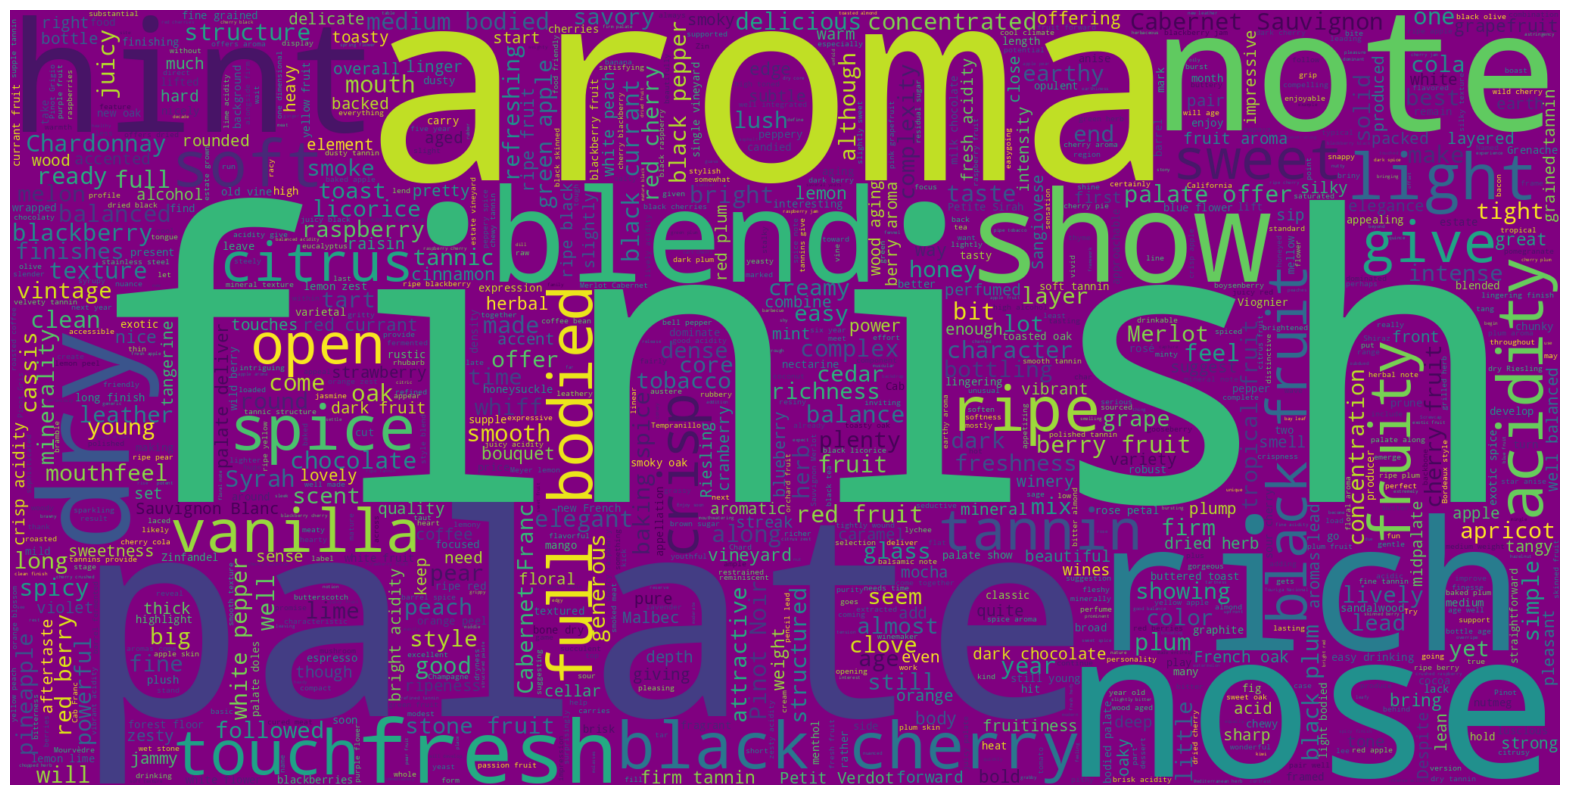

In [96]:
plt.figure(figsize=(20,18))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")

#**CONCLUSÃO**

##Contudo podemos entao responder às perguntas do inicio da atividade:

* **De onde vem o melhor vinho?**

  R: A Inglaterra é quem em média produz os melhores vinhos, porém também temos vinhos de alta qualidade em países como França, Itália, Portugal, Austrália e Estados Unidos.
* **O preço do vinho está relacionado com a qualidade?**

  R: Depois das análises foi possível verificar que sim, o preço esta relacionado com a qualidade do vinho, porém se você souber procurar, é possivel encontrar um vinho de $4 com uma pontuação proxima a um vinho de 3.300 dólares.
* **Certas variedades de uvas são de maior qualidade?**

  R: Todas as variedades estao niveladas. A maior aposta com base nos dados é o Pinot Noir
* **Qual é o melhor vinho em cada faixa de preço?**

  R: Como podemos analisar acima, foi definido vinhos com custo-benefício em 4 variações de preço, cabendo assim em cada orçamento.
* **Que palavras são mais utilizadas para descrever um vinho?**

  R: Como vemos acima na nossa nuvem de palavras podemos observar uma grande variação de palavras, entre elas temos: Finish, Palate, aroma, note.. entre outros

  

##**PERGUNTAS ADICIONAIS P1**

---

* **1) Com base nos dados, quais uvas são mais utilizadas na fabricação de vinhos?**

  R: A uva mais utilizada na fabricação dos vinhos é a Pinot Noir

In [138]:
Maior_variedade=df_dataset_cópia
Maior_variedade["variety"].value_counts()

,count
variety,
Pinot Noir,12785
Chardonnay,11077
Cabernet Sauvignon,9384
Red Blend,8466
Bordeaux-style Red Blend,5340
...,...
Orangetraube,1
Riesling-Chardonnay,1
Žilavka,1


* **2) Qual a adega que mais predominou na base de dados como produtora de vinhos?**

  R: A adega que mais produziu vinhos em nossa base de dados foi a Testarossa

In [127]:
Adega = df_dataset_cópia['winery'].mode()[0]
Adega

'Testarossa'